# PA8 : Density Map

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
from scipy.stats.kde import gaussian_kde 
import matplotlib.pyplot as plt

## Chargement des données

In [ ]:
df = pd.read_csv('/work/PA8/Dataset/output (3).csv')
df.head(3)

,trackID,class,frame,xmin,ymin,xmax,ymax,time,date
0,1,person,3,242,789,363,1080,23:22:11,02|Dec|2020
1,2,person,3,717,223,783,409,23:22:11,02|Dec|2020
2,3,person,3,1605,611,1715,864,23:22:11,02|Dec|2020


## Pré-traitement des données
### Nettoyage

In [ ]:
df.dropna(inplace=True)

### Matrice de données pour la carte de chaleur 

2D array avec les données centrales de chaque bounding box


In [ ]:
xpos = (df['xmax'] + df['xmin']) / 2
ypos = (df['ymax'] + df['ymin']) / 2

data = np.array([xpos, ypos])
x, y = data

## Calcul de densité

### Noyau avec filtre de Gauss

In [ ]:
k = gaussian_kde(np.vstack([x,y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

ATTENTION inversion de l'axe des y !!!

## Density Map

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


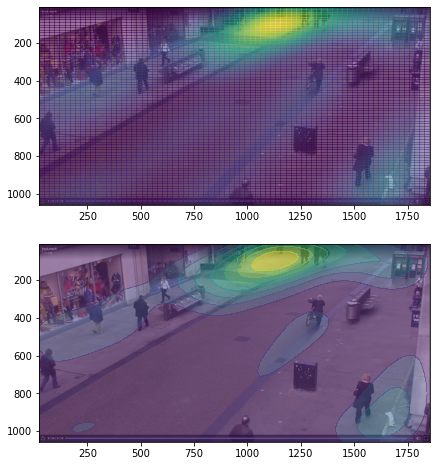

In [ ]:
fig = plt.figure(figsize=(7,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 pour mettre les cartes semi-transparentes
ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.5)
ax2.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)

# Définit les axes de la carte
ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.max(), y.min())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.max(), y.min())

# Superpose la density map avec l'image du magasin
im = plt.imread('/work/PA8/Dataset/fond.png')
ax1.imshow(im, extent=[x.min(), x.max(), y.max(), y.min()], aspect='auto')
ax2.imshow(im, extent=[x.min(), x.max(), y.max(), y.min()], aspect='auto')